<a href="https://colab.research.google.com/github/cathyXie08/Deep-Learning-Course-Examples/blob/master/x-ray%20for%20Stat's%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
!unzip /content/data.zip

Archive:  /content/data.zip
   creating: data/NonAugmentedTrain/
   creating: data/NonAugmentedTrain/BacterialPneumonia/
 extracting: data/NonAugmentedTrain/BacterialPneumonia/0.jpeg  
 extracting: data/NonAugmentedTrain/BacterialPneumonia/1.jpeg  
 extracting: data/NonAugmentedTrain/BacterialPneumonia/10.jpeg  
 extracting: data/NonAugmentedTrain/BacterialPneumonia/100.jpeg  
 extracting: data/NonAugmentedTrain/BacterialPneumonia/101.jpeg  
 extracting: data/NonAugmentedTrain/BacterialPneumonia/102.jpeg  
  inflating: data/NonAugmentedTrain/BacterialPneumonia/103.jpeg  
  inflating: data/NonAugmentedTrain/BacterialPneumonia/104.jpeg  
  inflating: data/NonAugmentedTrain/BacterialPneumonia/105.jpeg  
 extracting: data/NonAugmentedTrain/BacterialPneumonia/106.jpeg  
 extracting: data/NonAugmentedTrain/BacterialPneumonia/107.jpeg  
 extracting: data/NonAugmentedTrain/BacterialPneumonia/108.jpeg  
 extracting: data/NonAugmentedTrain/BacterialPneumonia/109.jpeg  
 extracting: data/NonAugme

In [ ]:
images = '/content/data/NonAugmentedTrain'

# New Section

In [ ]:
from os import listdir
from matplotlib import image
import cv2
# load all images in a directory
train_images = []
y_train = []
for filename in listdir(os.path.join(images,"Normal")):
    img_data = cv2.imread(os.path.join(images,"Normal",filename),0)
    train_images.append(img_data)
    y_train.append(0)

In [ ]:

# load all images in a directory
for filename in listdir(os.path.join(images,'COVID-19')):
    img_data = cv2.imread(os.path.join(images,"COVID-19",filename),0)
    train_images.append(img_data)
    y_train.append(1)

In [ ]:

# load all images in a directory
for filename in listdir(os.path.join(images,'BacterialPneumonia')):
    img_data = cv2.imread(os.path.join(images,"BacterialPneumonia",filename),0)
    train_images.append(img_data)
    y_train.append(2)

In [ ]:

# load all images in a directory
for filename in listdir(os.path.join(images,'ViralPneumonia')):
    img_data = cv2.imread(os.path.join(images,"ViralPneumonia",filename),0)
    train_images.append(img_data)
    y_train.append(3)

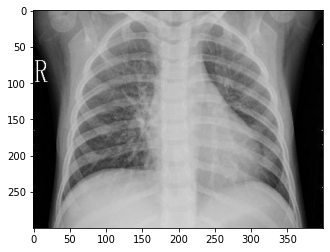

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_images[998],cmap = plt.cm.gray)

In [ ]:
imagest = '/content/data/ValData'

In [ ]:
from os import listdir
from matplotlib import image
import cv2
# load all images in a directory
test_images = []
y_test = []
for filename in listdir(os.path.join(imagest,"Normal")):
    img_datat = cv2.imread(os.path.join(imagest,"Normal",filename),0)
    test_images.append(img_datat)
    y_test.append(0)

In [ ]:
['Normal', 'COVID-19', 'BacterialPneumonia', 'ViralPneumonia']

['Normal', 'COVID-19', 'BacterialPneumonia', 'ViralPneumonia']

In [ ]:
from os import listdir
from matplotlib import image
# load all images in a directory
for filename in listdir(os.path.join(imagest,'COVID-19')):
    img_datat = cv2.imread(os.path.join(imagest,"COVID-19",filename),0)
    test_images.append(img_datat)
    y_test.append(1)

In [ ]:
from os import listdir
from matplotlib import image
# load all images in a directory
for filename in listdir(os.path.join(imagest,'BacterialPneumonia')):
    img_datat = cv2.imread(os.path.join(imagest,"BacterialPneumonia",filename),0)
    test_images.append(img_datat)
    y_test.append(2)

In [ ]:
from os import listdir
from matplotlib import image
# load all images in a directory
for filename in listdir(os.path.join(imagest,'ViralPneumonia')):
    img_datat = cv2.imread(os.path.join(imagest,"ViralPneumonia",filename),0)
    test_images.append(img_datat)
    y_test.append(3)

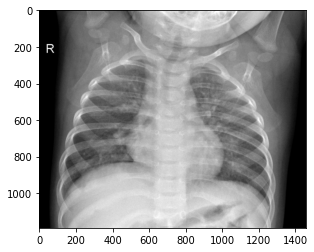

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_images[1],cmap = plt.cm.gray)

In [ ]:
import numpy as np
train_images = np.asarray(train_images)
y_train = np.asarray(y_train)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
test_images = np.asarray(test_images)
y_test = np.asarray(y_test)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
import cv2
x_train2 = []
for img in train_images:
    if len(img.shape)==2:
        img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
        x_train2.append(img)
x_train = np.array(x_train2).reshape(len(x_train2),256,256)

In [ ]:
x_test2 = []
for img in test_images:
    if len(img.shape)==2:
        img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
        x_test2.append(img)
x_test = np.array(x_test2).reshape(len(x_test2),256,256)

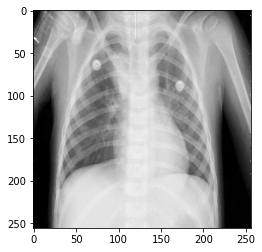

In [ ]:
plt.imshow(x_train[999],cmap = plt.cm.gray)

In [ ]:
rgb_x_train = np.repeat(x_train[..., np.newaxis], 3, -1) ##run this for Transfer learning CNN

In [ ]:
rgb_x_test = np.repeat(x_test[..., np.newaxis], 3, -1)  ###run this for Transfer learning CNN

In [ ]:
y_train = y_train.reshape(x_train.shape[0],1) ####run this for Multinomial logistic regression

In [ ]:
y_test = y_test.reshape(x_test.shape[0],1)  ####run this for Multinomial logistic regression

In [ ]:
x_train_flatten = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])  ####run this for Multinomial logistic regression
y_train = y_train.T

In [ ]:
x_test_flatten = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])  ####run this for Multinomial logistic regression
y_test = y_test.T

In [ ]:
x_train = x_train_flatten.T  ####run this for Multinomial logistic regression

In [ ]:
x_test= x_test_flatten.T  ####run this for Multinomial logistic regression

In [ ]:
from sklearn import preprocessing
x_train = preprocessing.scale(x_train)  ####run this for Multinomial logistic regression

In [ ]:
x_test = preprocessing.scale(x_test)  ####run this for Multinomial logistic regression

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


In [ ]:
clf = LogisticRegression(penalty='l2', C= 0.1,
                         tol=0.1, solver='saga',
                         multi_class='multinomial').fit(x_train.T,y_train.T)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("test accuracy: {} ".format(clf.fit(x_test.T, y_test.T).score(x_test.T, y_test.T)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test accuracy: 0.9329329329329329 


In [ ]:
old_max = max(clf.coef_[3])  ##begin from here: construct images for coefficients


In [ ]:
old_min = min(clf.coef_[3])

In [ ]:
 newcoef = []
 for Input in clf.coef_[3]:
    new = ((Input - old_min ) / (old_max  - old_min) * (255 - 0) + 0)
    newcoef.append(new)


In [ ]:
array = np.reshape(newcoef, (256, 256))

In [ ]:
from PIL import Image as im
data = im.fromarray(array)

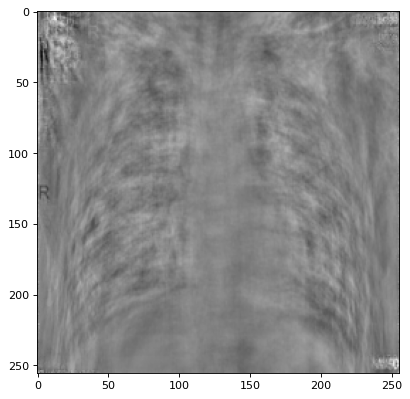

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.imshow(data,cmap = plt.cm.gray)

In [ ]:
old_max = max(clf.coef_[0])
old_min = min(clf.coef_[0])

In [ ]:
newcoef = []
for Input in clf.coef_[0]:
  new = ((Input - old_min ) / (old_max  - old_min) * (255 - 0) + 0)
  newcoef.append(new)

In [ ]:
array = np.reshape(newcoef, (256, 256))

In [ ]:
data = im.fromarray(array)

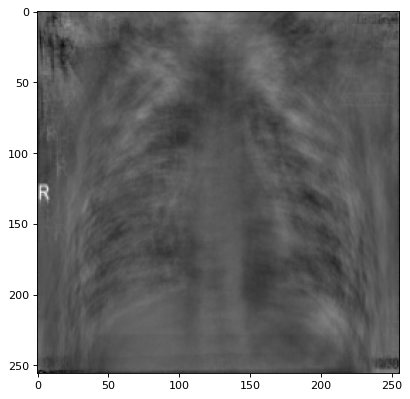

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.imshow(data,cmap = plt.cm.gray)

In [ ]:
old_max = max(clf.coef_[1])
old_min = min(clf.coef_[1])
newcoef = []
for Input in clf.coef_[1]:
  new = ((Input - old_min ) / (old_max  - old_min) * (255 - 0) + 0)
  newcoef.append(new)


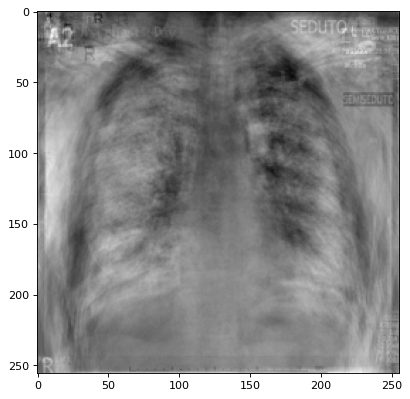

In [ ]:
array = np.reshape(newcoef, (256, 256))
data = im.fromarray(array)
figure(figsize=(8, 6), dpi=80)
plt.imshow(data,cmap = plt.cm.gray)

In [ ]:
old_max = max(clf.coef_[2])
old_min = min(clf.coef_[2])
newcoef = []
for Input in clf.coef_[2]:
  new = ((Input - old_min ) / (old_max  - old_min) * (255 - 0) + 0)
  newcoef.append(new)

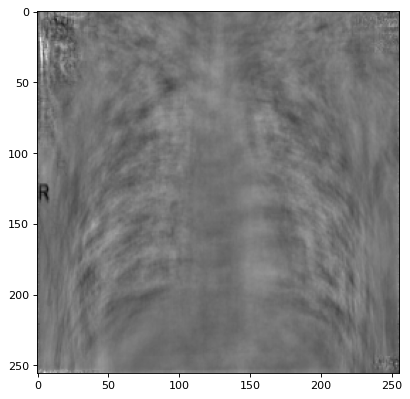

In [ ]:
array = np.reshape(newcoef, (256, 256))
data = im.fromarray(array)
figure(figsize=(8, 6), dpi=80)

data = im.fromarray(array)
plt.imshow(data,cmap = plt.cm.gray)   #############end here

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.model_selection import GridSearchCV

In [ ]:
model = LogisticRegression()  ###begin tuning for MLR

In [ ]:
penalty = ['l2']
c_values = [0.6, 1.0, 0.1, 0.3, 3.0]
solvers = ['saga']

In [ ]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train.T,y_train.T)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.780272 using {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
pred = clf.predict(x_test.T)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test.T, pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       450
           1       0.87      1.00      0.93        20
           2       0.65      0.59      0.62       324
           3       0.40      0.46      0.43       205

    accuracy                           0.73       999
   macro avg       0.72      0.75      0.73       999
weighted avg       0.73      0.73      0.73       999



In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test.T, pred)



In [ ]:
CM #By definition a confusion matrix C is such that C[i, j] is equal to the number of observations known to be in group i but predicted to be in group j.

array([[447,   0,   2,   1],
       [  1,  19,   0,   0],
       [  6,   0, 305,  13],
       [  8,   0,  34, 163]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix 
from sklearn.multiclass import OneVsRestClassifier  

In [ ]:
x_train_KNN = x_train_flatten           ###KNN model from here

In [ ]:
x_test_KNN = x_test_flatten

In [ ]:
x_train_KNN = preprocessing.scale(x_train_KNN) 

In [ ]:
x_test_KNN = preprocessing.scale(x_test_KNN) 

In [ ]:

y_train_KNN = np.asarray(y_train)

In [ ]:
y_train_KNN

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
knn = OneVsRestClassifier(KNeighborsClassifier())

In [ ]:
knn.fit(x_train_KNN ,y_train_KNN)

ValueError: ignored

In [ ]:
KNN_predictions = knn.predict(x_test_KNN)

In [ ]:
print('KNN Accuracy: %.3f' % accuracy_score(y_test,KNN_predictions))

KNN Accuracy: 0.720


In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, KNN_predictions)


NameError: ignored

In [ ]:
CM

array([[385,   1,  48,  16],
       [  0,  19,   1,   0],
       [  7,   0, 247,  70],
       [ 12,   1, 117,  75]])

In [ ]:
from sklearn.model_selection import GridSearchCV  #####tuning for KNN
n_neighbors = list(range(5,20))
p=[1,2]


hyperparameters = dict(n_neighbors=n_neighbors, p=p)

knn_2 = KNeighborsClassifier()

clf = GridSearchCV(knn_2, hyperparameters, cv=10)

best_model = clf.fit(x_train_KNN ,y_train_KNN)

print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

ValueError: ignored

In [ ]:
knn_t = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=7, metric="manhattan"))
knn_t.fit(x_train_KNN ,y_train_KNN)

OneVsRestClassifier(estimator=KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=7))

In [ ]:
knn_t_predictions = knn_t.predict(x_test_KNN)

In [ ]:
print('KNN Accuracy: %.3f' % accuracy_score(y_test,knn_t_predictions))

KNN Accuracy: 0.733


In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, knn_t_predictions)
CM

array([[399,   0,  31,  20],
       [  1,  16,   3,   0],
       [  9,   0, 244,  71],
       [ 15,   1, 116,  73]])

In [ ]:
print(classification_report(y_test.T, knn_t_predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       450
           1       0.94      0.80      0.86        20
           2       0.62      0.75      0.68       324
           3       0.45      0.36      0.40       205

    accuracy                           0.73       999
   macro avg       0.74      0.70      0.71       999
weighted avg       0.73      0.73      0.73       999



In [ ]:
from sklearn.svm import SVC  
import sklearn.model_selection as model_selection
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01],'degree':[3,5], 'kernel': ['rbf', 'poly']}  ##tuning for SVM

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,n_jobs=-1)
grid.fit(x_train.T,y_train.T)
print(grid.best_estimator_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 26.0min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 146.3min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 177.4min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
print(grid.best_estimator_)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
grid_predictions = grid.predict(x_test.T)


NameError: ignored

In [ ]:
from sklearn.metrics import classification_report
print(confusion_matrix(y_test.T,grid_predictions)) 
print(classification_report(y_test.T,grid_predictions))

[[432   0  10   8]
 [  0  19   1   0]
 [  8   0 224  92]
 [ 16   1 112  76]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       450
           1       0.95      0.95      0.95        20
           2       0.65      0.69      0.67       324
           3       0.43      0.37      0.40       205

    accuracy                           0.75       999
   macro avg       0.74      0.74      0.74       999
weighted avg       0.74      0.75      0.75       999



In [ ]:
print('SVM Accuracy: %.3f' % accuracy_score(y_test.T,grid_predictions))



SVM Accuracy: 0.752


In [ ]:
import cv2         ########run this in place of above for CNN
x_train2 = []
for img in train_images:
    if len(img.shape)==2:
        img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
        x_train2.append(img)
x_train = np.array(x_train2).reshape(len(x_train2),256,256,1)

In [ ]:
x_test2 = []
for img in test_images:
    if len(img.shape)==2:
        img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
        x_test2.append(img)
x_test = np.array(x_test2).reshape(len(x_test2),256,256,1)

In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten,AveragePooling2D
from keras.utils import np_utils
from sklearn.metrics import accuracy_score

In [ ]:
n_classes = 4                                                ########normalization for regular CNN
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [ ]:
x_train = x_train.astype('float32')                          ########normalization for regular CNN
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
X_train = rgb_x_train.astype('float32')  #####only for transfer learning
X_test = rgb_x_test.astype('float32')
X_train /= 255
X_test /= 255

# New Section

In [ ]:
!pip install keras-tuner
import tensorflow as tf
from keras.utils import np_utils
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import kerastuner as kt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [ ]:
def create_model(hyperparam):      ##tunning self-defined CNN
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hyperparam.Int('convolution_1',min_value=5, max_value=15, step=3), kernel_size=hyperparam.Choice('convolution_1', values = [3,5,7,11]),
        activation='relu',input_shape=(256, 256, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2, padding = 'valid'),
    keras.layers.Conv2D( 
        filters=hyperparam.Int('convolution_2', min_value=5, max_value=15, step=3),kernel_size=hyperparam.Choice('convolution_2', values = [3,5,7,11]),
        activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2, padding = 'valid'),
    keras.layers.Conv2D(
        filters=hyperparam.Int('convolution_3', min_value=5, max_value=15, step=3),kernel_size=hyperparam.Choice('convolution_3', values = [3,5,7,11]),
        activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2, padding = 'valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(hyperparam.Int('num_of_neurons_1',min_value=40,max_value=320,step=40), activation='relu'),
    keras.layers.Dropout(hyperparam.Float('drop_out_rate_1', min_value = 0.0, max_value = 0.6, step = 0.1)),
    keras.layers.Dense(hyperparam.Int('num_of_neurons_2',min_value=40,max_value=320,step=40), activation='relu'),
    keras.layers.Dropout(hyperparam.Float('drop_out_rate_2', min_value = 0.0, max_value = 0.6, step = 0.1)),
    keras.layers.Dense(hyperparam.Int('num_of_neurons_3',min_value=40,max_value=320,step=40), activation='relu'),
    keras.layers.Dropout(hyperparam.Float('drop_out_rate_2', min_value = 0.0, max_value = 0.6, step = 0.1)),
    keras.layers.Dense(4, activation = "softmax")
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
tuner_search=RandomSearch(create_model,
                       objective='val_accuracy',
                       max_trials=70,directory='x-ray3',project_name="cnn_covid")


INFO:tensorflow:Reloading Oracle from existing project x-ray3/cnn_covid/oracle.json
INFO:tensorflow:Reloading Tuner from x-ray3/cnn_covid/tuner0.json


In [ ]:
tuner_search.search(x_train,y_train,epochs=20,validation_split = 0.2)

INFO:tensorflow:Oracle triggered exit


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 5)       130       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 5)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 8)       2568      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 8)         4104      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 8)        0

In [ ]:
best_hps=tuner_search.get_best_hyperparameters(num_trials=1)[0]
best_hps.get('num_of_neurons_1')


200

In [ ]:
best_hps.get('num_of_neurons_2')

320

In [ ]:
best_hps.get('num_of_neurons_3')

280

In [ ]:
best_hps.get('drop_out_rate_1')

0.0

In [ ]:
best_hps.get('drop_out_rate_2')

0.4

In [ ]:
score = model.evaluate(x_test, y_test)

RuntimeError: ignored

In [ ]:
pre = model.predict(x_test)


array([[[[2.02644095e-02, 0.00000000e+00, 2.99681928e-02, ...,
          1.93919949e-02, 1.78144723e-02, 4.17075604e-02],
         [2.47082207e-03, 0.00000000e+00, 1.32770166e-02, ...,
          1.33480253e-02, 1.13647562e-02, 5.06817587e-02],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          3.94211430e-03, 6.50238246e-04, 5.91579452e-02],
         ...,
         [0.00000000e+00, 0.00000000e+00, 1.25581667e-01, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 1.06205128e-01, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 1.15734063e-01, ...,
          9.54626966e-03, 0.00000000e+00, 0.00000000e+00]],

        [[2.01689191e-02, 0.00000000e+00, 2.89902817e-02, ...,
          1.89497098e-02, 1.77558567e-02, 4.37362827e-02],
         [2.49851961e-03, 0.00000000e+00, 1.28326714e-02, ...,
          1.25762904e-02, 1.20691340e-02, 5.07659316e-02],
        

In [ ]:
y_pred = np.argmax(pre, axis=-1) 

In [ ]:
y_pred

array([[[7, 7, 7, ..., 2, 2, 2],
        [7, 7, 7, ..., 2, 2, 2],
        [7, 7, 7, ..., 2, 2, 2],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]],

       [[1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]],

       [[2, 2, 2, ..., 1, 2, 2],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 7, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 7, ..., 2, 2, 2],
        [2, 2, 7, ..., 2, 2, 2],
        [2, 2, 7, ..., 2, 2, 2]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2]],

       [[2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [7, 2, 2, ..., 2, 2, 2],
        ...,
        [2, 2, 7, ..., 

In [ ]:
from numpy import expand_dims                ####from here get feature map
img = cv2.resize(x_test[998], (256, 256), interpolation = cv2.INTER_AREA)
img = expand_dims(img, axis=0)
img = np.array(img).reshape(len(img),256,256)
img=  img  / (255.0) 

In [ ]:
from keras.models import Model
model = Model(inputs=model.inputs, outputs=model.layers[2].output)
feature_maps = model.predict(img)

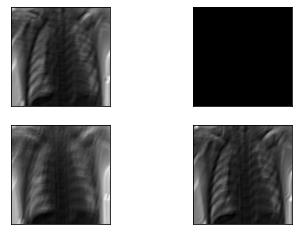

In [ ]:
from matplotlib import pyplot
square = 2
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

(1, 126, 126, 5)
(1, 119, 119, 8)
(1, 59, 59, 8)
(1, 52, 52, 8)
(1, 26, 26, 8)
(1, 5408)
(1, 200)
(1, 200)
(1, 320)
(1, 320)
(1, 240)
(1, 240)
(1, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


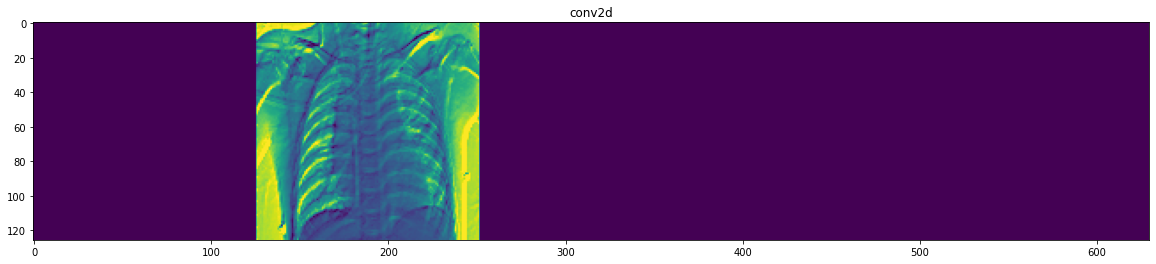

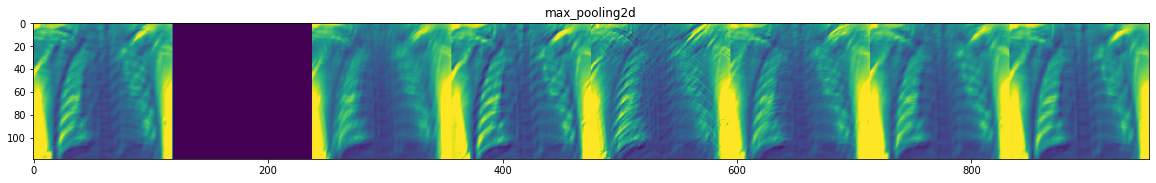

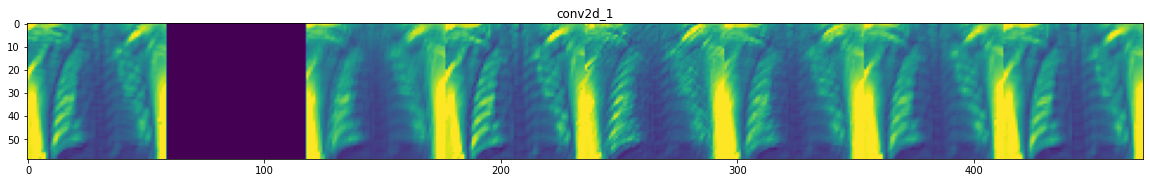

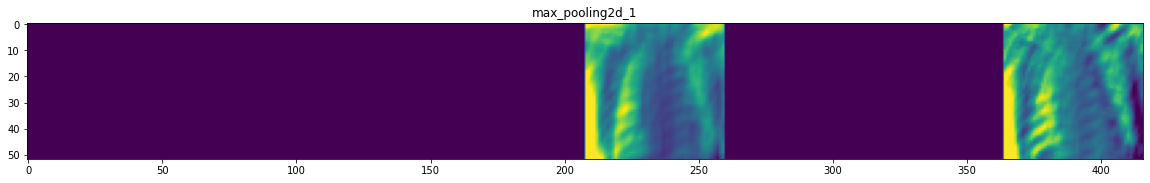

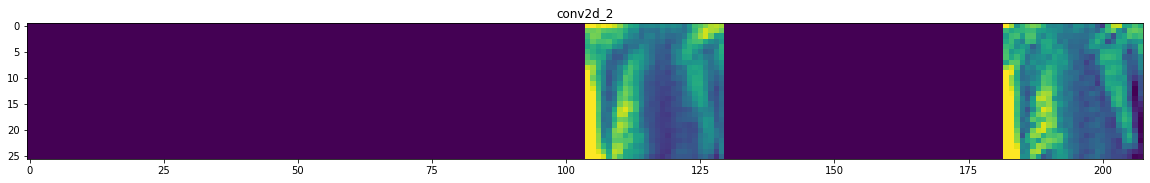

In [ ]:
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(img )
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test.T, y_pred))

ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test.T, y_pred)
CM

array([[448,   1,   1,   0],
       [  1,  18,   0,   1],
       [ 66,   1, 252,   5],
       [ 54,   2, 142,   7]])

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16 #######Transfer learning from here

In [ ]:
base_model = VGG16(weights="imagenet", include_top = False,  input_shape=(256,256,3))

In [ ]:
base_model.summary()
base_model.trainable = False

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
from tensorflow.keras import layers, models
pooling_layer = layers.AveragePooling2D(pool_size = (4, 4))
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(64, activation='relu')
drop_out_layer = layers.Dropout(0.5)
prediction_layer = layers.Dense(4, activation='softmax')

model = models.Sequential([
    base_model,
    pooling_layer,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    drop_out_layer,
    prediction_layer
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
model.fit(X_train, y_train, epochs=15, batch_size = 8)


Epoch 1/15


ValueError: ignored

In [ ]:
score = model.evaluate(X_test, y_test)

32/32 [==============================] - 3s 82ms/step - loss: 1.7789 - accuracy: 0.0250


In [ ]:
pre = model.predict(X_test)


In [ ]:
y_pred = np.argmax(pre, axis=-1) 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test.T, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       450
           1       0.90      0.90      0.90        20
           2       0.67      0.80      0.73       324
           3       0.54      0.31      0.40       205

    accuracy                           0.79       999
   macro avg       0.76      0.75      0.75       999
weighted avg       0.77      0.79      0.77       999



In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test.T, y_pred)
CM

array([[444,   1,   0,   5],
       [  0,  18,   2,   0],
       [ 15,   0, 259,  50],
       [ 15,   1, 125,  64]])